# Format PR2 output


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob

### File Locations

In [2]:
prefix = 'GLOMICON'

#Data Directory
directory = '../data/'


### Functions

In [3]:
# Dada2 Banzai Output Functions
levels = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

def make_metadata(infile):
    df = pd.read_csv(infile,index_col=0)
    df.index.names = ['sample_name']
    #df['date'] = pd.to_datetime(df['date'])
    print('Number samples:', len(df.index))
    return df

def make_taxa_asv(infile):
    df = pd.read_csv(infile)
    #df = df.drop('Unnamed: 0', axis=0)
    #df = df.rename(columns= {'Unnamed: 0':'ASV'})
    #df.set_index('ASV', inplace=True)
    print('Number ASVs:', len(df.index))
    return df

#from metadata file, limit OTU table and taxa table to those present in those samples
def from_metadata_to_taxareads(meta_data, otu_table, taxa_table):
    #standard M6 output; sample_names as index; OTUs as index
    cols = list(meta_data)
    otu_lim = pd.concat([meta_data, otu_table.T],join='inner', axis=1)
    otu_lim.drop(cols, inplace=True, axis=1)
    otu_lim=otu_lim.T
    otu_lim['Total']=otu_lim.sum(axis=1)
    otu_lim = otu_lim.loc[otu_lim['Total']>0]
    otu_lim.drop('Total', axis=1, inplace=True)
    cols=list(otu_lim)
    taxa_lim=pd.concat([otu_lim, taxa_table], axis=1, join='inner')
    taxa_lim.drop(cols, inplace=True, axis=1)
    return otu_lim, taxa_lim

### Import PR2 taxonomy

In [4]:
file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/PR2/GLOMICON_seq_merged_unique.dada2_041525.taxo'
df = pd.read_csv(file, sep='\t')
df.set_index('sequence_hash', inplace=True)
pr2 = df.copy()

['domain', 'supergroup', 'division', 'subdivision', 'class', 'order', 'family', 'genus', 'species', 'domain_boot', 'supergroup_boot', 'division_boot', 'subdivision_boot', 'class_boot', 'order_boot', 'family_boot', 'genus_boot', 'species_boot']


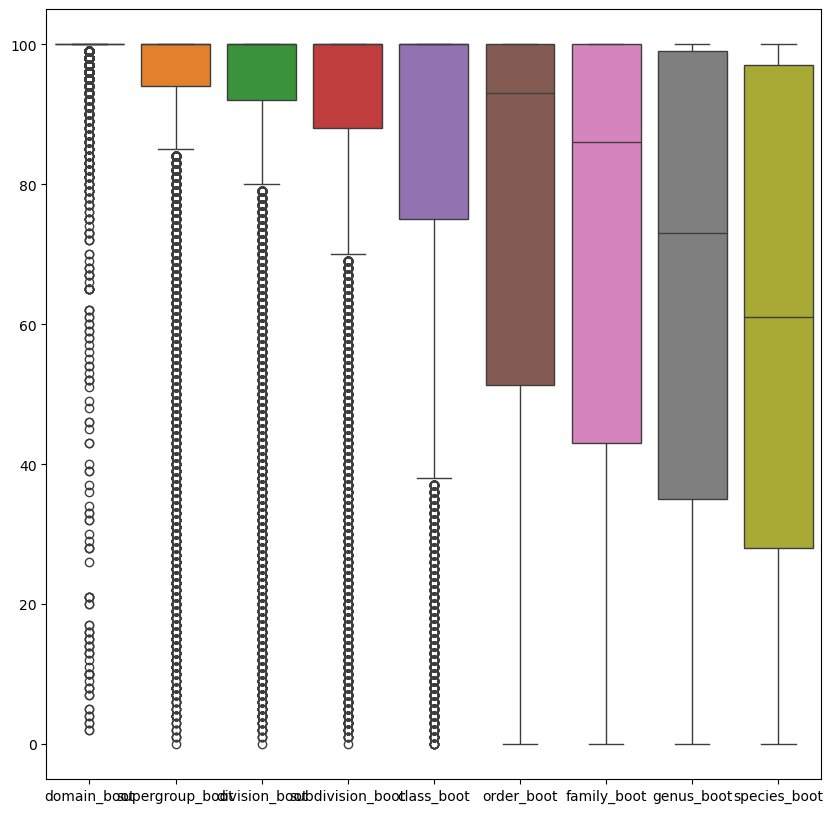

domain      supergroup       division     subdivision  \
sequence_hash                                                             
ASV_1          Eukaryota        Haptista     Haptophyta    Haptophyta_X   
ASV_2          Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_3          Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_4          Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_5          Eukaryota            TSAR      Alveolata  Dinoflagellata   
...                  ...             ...            ...             ...   
ASV_14543      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_14544      Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14545      Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14546      Eukaryota            TSAR       Rhizaria      Radiolaria   
ASV_14547      Eukaryota  Archaeplastida    Chlorophyta   Chlorophyta_X   

                             class             order                   family  \
sequence_hash                                                                   
ASV_1             Prymnesiophyceae     Phaeocystales           Phaeocystaceae   
ASV_2                 Mediophyceae  Thalassiosirales        Thalassiosiraceae   
ASV_3          Coscinodiscophyceae       Melosirales             Melosiraceae   
ASV_4            Bacillariophyceae     Bacillariales           Bacillariaceae   
ASV_5                  Dinophyceae     Gymnodiniales              Kareniaceae   
...                            ...               ...                      ...   
ASV_14543            Pelagophyceae   Pelagomonadales  Pelagomonadales_clade_A   
ASV_14544        Oligohymenophorea            OLIGO5                 OLIGO5_X   
ASV_14545             Spirotrichea     Oligotrichida            Strombidiidae   
ASV_14546               Acantharea      Acantharea_4            Acantharea_4d   
ASV_14547          Mamiellophyceae       Mamiellales             Mamiellaceae   

                                   genus                        species  \
sequence_hash                                                             
ASV_1                        Phaeocystis          Phaeocystis_pouchetii   
ASV_2                        Conticribra        Conticribra_weissflogii   
ASV_3                           Melosira                 Melosira_dubia   
ASV_4                   Pseudo-nitzschia       Pseudo-nitzschia_seriata   
ASV_5                            Karenia              Karenia_mikimotoi   
...                                  ...                            ...   
ASV_14543      Pelagomonadales_clade_A_X  Pelagomonadales_clade_A_X_sp.   
ASV_14544                      OLIGO5_XX                  OLIGO5_XX_sp.   
ASV_14545                Strombidiidae_X            Strombidiidae_X_sp.   
ASV_14546                Acantharea_4d_X            Acantharea_4d_X_sp.   
ASV_14547                     Micromonas             Micromonas_polaris   

               domain_boot  supergroup_boot  division_boot  subdivision_boot  \
sequence_hash                                                                  
ASV_1                  100              100            100               100   
ASV_2                  100              100            100               100   
ASV_3                  100               99             99                99   
ASV_4                  100              100            100               100   
ASV_5                  100              100            100               100   
...                    ...              ...            ...               ...   
ASV_14543              100              100            100               100   
ASV_14544              100              100            100               100   
ASV_14545              100              100            100               100   
ASV_14546              100              100            100               100   
ASV_14547              100              100         

In [5]:
import seaborn as sns
df = pr2.copy()
# look at range of boot values per taxonomic level
print(list(df))
tax_levels = ['domain', 'supergroup', 'division', 'subdivision', 'class', 'order', 'family', 'genus', 'species']
'''for i in tax_levels:
    df[i+'_boot'].hist(bins=100)
    plt.title(i)
    plt.show()'''
f = plt.figure(figsize=[10,10])
sns.boxplot(data=df)
plt.show()
df

In [6]:
# look at top hit to PR2 by blastn search:
file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/PR2/PR2_blast_results_tophits.csv'
df = pd.read_csv(file)
df.set_index('ASV', inplace=True)
blast_tophits = df.copy()
df

Hit_number          eval  bitscore     %ID  \
ASV                                                     
ASV_1               1  0.000000e+00       350  100.00   
ASV_2               1  3.815610e-61       127  100.00   
ASV_3               1  3.842700e-56       118   97.64   
ASV_4               1  3.815610e-61       127  100.00   
ASV_5               1  1.358880e-60       126  100.00   
...               ...           ...       ...     ...   
ASV_14543           1  0.000000e+00       357   97.90   
ASV_14544           1  0.000000e+00       361   99.73   
ASV_14545           1  0.000000e+00       368  100.00   
ASV_14546           1  0.000000e+00       365  100.00   
ASV_14547           1  0.000000e+00       369  100.00   

                                                     hit_def  align_len  \
ASV                                                                       
ASV_1      KC488454.1.1667_U|18S_rRNA|nucleus|clone_HL5aS...        350   
ASV_2      AJ535170.1.1763_U|18S_rRNA|nucleus|clone_p928|...        127   
ASV_3      KJ961704.1.1788_U|18S_rRNA|nucleus|strain_52|E...        127   
ASV_4      GU373969.1.1789_U|18S_rRNA|nucleus|strain_CCMP...        127   
ASV_5      MN965778.1.1765_U|18S_rRNA|nucleus||Eukaryota|...        126   
...                                                      ...        ...   
ASV_14543  KY979976.1.1705_U|18S_rRNA|nucleus||Eukaryota|...        381   
ASV_14544  KR064016.1.709_U|18S_rRNA|nucleus|clone_St4_DC...        364   
ASV_14545  KJ762992.1.1771_U|18S_rRNA|nucleus|clone_SGUH1...        368   
ASV_14546  KJ763536.1.1777_U|18S_rRNA|nucleus|clone_SGYP1...        365   
ASV_14547  PQ554980.1.536_U|18S_rRNA|nucleus||Eukaryota|A...        369   

                      PR2_ID PR2_marker location                       nuc  \
ASV                                                                          
ASV_1      KC488454.1.1667_U   18S_rRNA  nucleus         clone_HL5aSF04.03   
ASV_2      AJ535170.1.1763_U   18S_rRNA  nucleus                clone_p928   
ASV_3      KJ961704.1.1788_U   18S_rRNA  nucleus                 strain_52   
ASV_4      GU373969.1.1789_U   18S_rRNA  nucleus           strain_CCMP1440   
ASV_5      MN965778.1.1765_U   18S_rRNA  nucleus                       NaN   
...                      ...        ...      ...                       ...   
ASV_14543  KY979976.1.1705_U   18S_rRNA  nucleus                       NaN   
ASV_14544   KR064016.1.709_U   18S_rRNA  nucleus  clone_St4_DCM_31-71_502f   
ASV_14545  KJ762992.1.1771_U   18S_rRNA  nucleus            clone_SGUH1368   
ASV_14546  KJ763536.1.1777_U   18S_rRNA  nucleus            clone_SGYP1304   
ASV_14547   PQ554980.1.536_U   18S_rRNA  nucleus                       NaN   

              Domain      Supergroup       Division     Subdivision  \
ASV                                                                   
ASV_1      Eukaryota        Haptista     Haptophyta    Haptophyta_X   
ASV_2      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_3      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_4      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_5      Eukaryota            TSAR      Alveolata  Dinoflagellata   
...              ...             ...            ...             ...   
ASV_14543  Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_14544  Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14545  Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14546  Eukaryota            TSAR       Rhizaria      Radiolaria   
ASV_14547  Eukaryota  Archaeplastida    Chlorophyta   Chlorophyta_X   

                         Class             Order                   Family  \
ASV                                                                         
ASV_1         Prymnesiophyceae     Phaeocystales           Phaeocystaceae   
ASV_2             Mediophyceae  Thalassiosirales        Thalassiosiraceae   
ASV_3      Coscinodiscophyceae       Melosiral

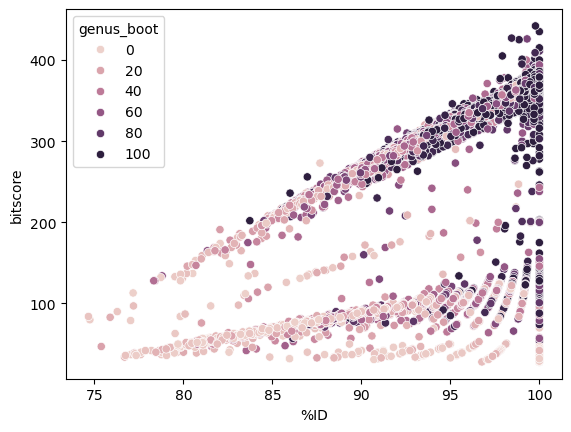

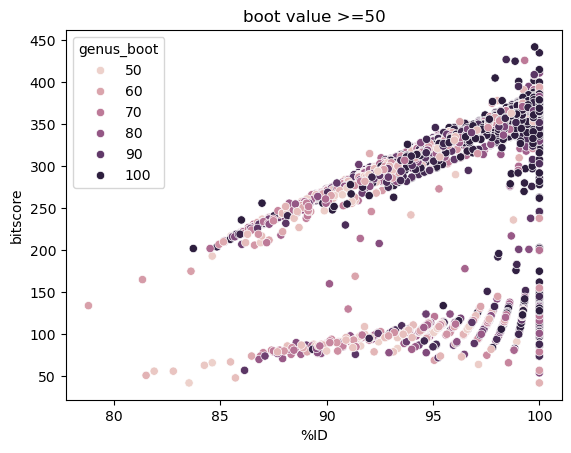

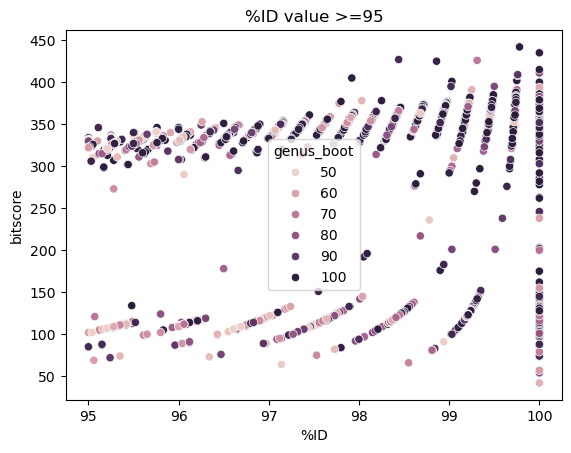

domain      supergroup       division     subdivision  \
ASV_1      Eukaryota        Haptista     Haptophyta    Haptophyta_X   
ASV_2      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_3      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_4      Eukaryota            TSAR  Stramenopiles         Gyrista   
ASV_8      Eukaryota  Archaeplastida    Chlorophyta   Chlorophyta_X   
...              ...             ...            ...             ...   
ASV_14542  Eukaryota  Archaeplastida     Rhodophyta  Eurhodophytina   
ASV_14544  Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14545  Eukaryota            TSAR      Alveolata      Ciliophora   
ASV_14546  Eukaryota            TSAR       Rhizaria      Radiolaria   
ASV_14547  Eukaryota  Archaeplastida    Chlorophyta   Chlorophyta_X   

                         class             order             family  \
ASV_1         Prymnesiophyceae     Phaeocystales     Phaeocystaceae   
ASV_2             Mediophyceae  Thalassiosirales  Thalassiosiraceae   
ASV_3      Coscinodiscophyceae       Melosirales       Melosiraceae   
ASV_4        Bacillariophyceae     Bacillariales     Bacillariaceae   
ASV_8      Pyramimonadophyceae   Pyramimonadales   Pyramimonadaceae   
...                        ...               ...                ...   
ASV_14542      Florideophyceae        Ceramiales      Rhodomelaceae   
ASV_14544    Oligohymenophorea            OLIGO5           OLIGO5_X   
ASV_14545         Spirotrichea     Oligotrichida      Strombidiidae   
ASV_14546           Acantharea      Acantharea_4      Acantharea_4d   
ASV_14547      Mamiellophyceae       Mamiellales       Mamiellaceae   

                      genus                   species  domain_boot  ...  \
ASV_1           Phaeocystis     Phaeocystis_pouchetii          100  ...   
ASV_2           Conticribra   Conticribra_weissflogii          100  ...   
ASV_3              Melosira            Melosira_dubia          100  ...   
ASV_4      Pseudo-nitzschia  Pseudo-nitzschia_seriata          100  ...   
ASV_8           Pyramimonas       Pyramimonas_parkeae          100  ...   
...                     ...                       ...          ...  ...   
ASV_14542          Ululania         Ululania_stellata          100  ...   
ASV_14544         OLIGO5_XX             OLIGO5_XX_sp.          100  ...   
ASV_14545   Strombidiidae_X       Strombidiidae_X_sp.          100  ...   
ASV_14546   Acantharea_4d_X       Acantharea_4d_X_sp.          100  ...   
ASV_14547        Micromonas        Micromonas_polaris          100  ...   

           division_boot  subdivision_boot  class_boot  order_boot  \
ASV_1                100               100         100         100   
ASV_2                100               100         100         100   
ASV_3                 99                99          95          62   
ASV_4                100               100         100          97   
ASV_8                100               100         100         100   
...                  ...               ...         ...         ...   
ASV_14542            100               100         100         100   
ASV_14544            100               100         100         100   
ASV_14545            100               100         100         100   
ASV_14546            100               100         100         100   
ASV_14547            100               100         100         100   

           family_boot  genus_boot  species_boot  bitscore     %ID  \
ASV_1              100         100            99     350.0  100.00   
ASV_2               95          80            80     127.0  100.00   
ASV_3               62          62            57     118.0   97.64   
ASV_4               97          97            90     127.0  100.00   
ASV_8               99          99            95     131.0  100.00   
...                ...         ...           ...       ...     ...   
ASV_14542          100          87            87     366.0   99.73   
ASV_14

In [7]:
# merge together
# different ASV lengths depending on marker used, affects bitscore.
# default boot value for dada2 is 50?

df = pd.concat([pr2, blast_tophits[['bitscore', '%ID', 'hit_def']]], axis=1)
#df.plot(x='%ID', y='class_boot', kind='scatter')
sns.scatterplot(data=df, x='%ID', y='bitscore', hue='genus_boot')
#df.plot(x='bitscore', y='class_boot', kind='scatter')
plt.show()

df = df.loc[df['genus_boot']>=50]
sns.scatterplot(data=df, x='%ID', y='bitscore', hue='genus_boot')
plt.title('boot value >=50')
#df.plot(x='bitscore', y='class_boot', kind='scatter')
plt.show()
# normal limits:
df = df.loc[df['%ID']>=95]
sns.scatterplot(data=df, x='%ID', y='bitscore', hue='genus_boot')
plt.title('%ID value >=95')
#df.plot(x='bitscore', y='class_boot', kind='scatter')
plt.show()

df

### Set boot limit and create pr2 assignment dataset

In [17]:
# set boot limit
boot_lim = 50
df = pr2.copy()
for i in tax_levels:
    df.loc[df[i+'_boot']<=boot_lim, i] = np.nan
df.reset_index(inplace=True)
df = df.rename(columns={'sequence_hash':'ASV'})
df.set_index('ASV', inplace=True)
pr2_lim = df.copy()
#export limited data
file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/PR2/PR2_dada2_results_bootlim_'+str(boot_lim)+'.csv'
df.to_csv(file)
# save just taxonomy as well - need to match to all ASVs (with duplicate sequences)
# file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/data/pr2_reassigned/GLOMICON_taxa_PR2_'+str(boot_lim)+'.csv'
# df[tax_levels].to_csv(file)
pr2_lim.head()

domain supergroup       division     subdivision  \
ASV                                                          
ASV_1  Eukaryota   Haptista     Haptophyta    Haptophyta_X   
ASV_2  Eukaryota       TSAR  Stramenopiles         Gyrista   
ASV_3  Eukaryota       TSAR  Stramenopiles         Gyrista   
ASV_4  Eukaryota       TSAR  Stramenopiles         Gyrista   
ASV_5  Eukaryota       TSAR      Alveolata  Dinoflagellata   

                     class             order             family  \
ASV                                                               
ASV_1     Prymnesiophyceae     Phaeocystales     Phaeocystaceae   
ASV_2         Mediophyceae  Thalassiosirales  Thalassiosiraceae   
ASV_3  Coscinodiscophyceae       Melosirales       Melosiraceae   
ASV_4    Bacillariophyceae     Bacillariales     Bacillariaceae   
ASV_5          Dinophyceae     Gymnodiniales                NaN   

                  genus                   species  domain_boot  \
ASV                                                              
ASV_1       Phaeocystis     Phaeocystis_pouchetii          100   
ASV_2       Conticribra   Conticribra_weissflogii          100   
ASV_3          Melosira            Melosira_dubia          100   
ASV_4  Pseudo-nitzschia  Pseudo-nitzschia_seriata          100   
ASV_5               NaN                       NaN          100   

       supergroup_boot  division_boot  subdivision_boot  class_boot  \
ASV                                                                   
ASV_1              100            100               100         100   
ASV_2              100            100               100         100   
ASV_3               99             99                99          95   
ASV_4              100            100               100         100   
ASV_5              100            100               100         100   

       order_boot  family_boot  genus_boot  species_boot  
ASV                                                       
ASV_1         100          100         100            99  
ASV_2         100           95          80            80  
ASV_3          62           62          62            57  
ASV_4          97           97          97            90  
ASV_5          59           47          45            38

### match to otu table; handle ASVs without assignment
- 13542 unique sequences are present
- 14548 unique ASVs across project
- need to match back to sequence, and otu table.

In [87]:
df = seq_all.copy()
print(df.head())
df = pr2_lim[tax_levels].join(seq_all[['sequence']])
#just taxonomy by sequence:
df.set_index('sequence', inplace=True)
# now recreate taxonomy table:
df1 = seq_all.reset_index().set_index('sequence')
df = df.join(df1)
df = df.set_index('ASV')
df = df.drop('Analyzing_Institute', axis=1)
taxa_pr2 = df.copy()  # all ASVs with relevant pr2 taxonomy
file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/data/pr2_reassigned/GLOMICON_taxa_PR2_'+str(boot_lim)+'.csv'
df.to_csv(file)
taxa_pr2.head()

# no need to alter otu table, metadata table because not limiting by taxonomy yet.
df

                                                sequence Analyzing_Institute
ASV                                                                         
ASV_1  CAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGG...                UDAL
ASV_2  GCACCTACCGATTGAATGGTCCGGTGAAGACTCGGGATTGTGGTCT...               MBARI
ASV_3  GCACCTACCGATTGAATGGTCCGGTGAGGCCTCGGGATCGTGGCGA...               MBARI
ASV_4  GCACCTACCGATTGAATGGTCCGGTGAAGCCTCGGGATTGTGGTTG...               MBARI
ASV_5  GCTCCTACCGATTGAGTGATCCGGTGAATAATTCGGACTGCAGCAG...               MBARI


domain      supergroup       division    subdivision  \
ASV                                                                  
ASV_1      Eukaryota        Haptista     Haptophyta   Haptophyta_X   
ASV_2      Eukaryota            TSAR  Stramenopiles        Gyrista   
ASV_6      Eukaryota            TSAR  Stramenopiles        Gyrista   
ASV_3      Eukaryota            TSAR  Stramenopiles        Gyrista   
ASV_7      Eukaryota            TSAR  Stramenopiles        Gyrista   
...              ...             ...            ...            ...   
ASV_14543  Eukaryota            TSAR  Stramenopiles        Gyrista   
ASV_14544  Eukaryota            TSAR      Alveolata     Ciliophora   
ASV_14545  Eukaryota            TSAR      Alveolata     Ciliophora   
ASV_14546  Eukaryota            TSAR       Rhizaria     Radiolaria   
ASV_14547  Eukaryota  Archaeplastida    Chlorophyta  Chlorophyta_X   

                         class             order                   family  \
ASV                                                                         
ASV_1         Prymnesiophyceae     Phaeocystales           Phaeocystaceae   
ASV_2             Mediophyceae  Thalassiosirales        Thalassiosiraceae   
ASV_6             Mediophyceae  Thalassiosirales        Thalassiosiraceae   
ASV_3      Coscinodiscophyceae       Melosirales             Melosiraceae   
ASV_7      Coscinodiscophyceae       Melosirales             Melosiraceae   
...                        ...               ...                      ...   
ASV_14543        Pelagophyceae   Pelagomonadales  Pelagomonadales_clade_A   
ASV_14544    Oligohymenophorea            OLIGO5                 OLIGO5_X   
ASV_14545         Spirotrichea     Oligotrichida            Strombidiidae   
ASV_14546           Acantharea      Acantharea_4            Acantharea_4d   
ASV_14547      Mamiellophyceae       Mamiellales             Mamiellaceae   

                     genus                  species  
ASV                                                  
ASV_1          Phaeocystis    Phaeocystis_pouchetii  
ASV_2          Conticribra  Conticribra_weissflogii  
ASV_6          Conticribra  Conticribra_weissflogii  
ASV_3             Melosira           Melosira_dubia  
ASV_7             Melosira           Melosira_dubia  
...                    ...                      ...  
ASV_14543              NaN                      NaN  
ASV_14544        OLIGO5_XX            OLIGO5_XX_sp.  
ASV_14545  Strombidiidae_X      Strombidiidae_X_sp.  
ASV_14546  Acantharea_4d_X      Acantharea_4d_X_sp.  
ASV_14547       Micromonas       Micromonas_polaris  

[14547 rows x 9 columns]

Now need to:
- filter ASVs by new PR2 taxonomy, removing metazoans and fungi (focus on protists)

# Import Previous Taxonomy and Data

In [88]:
marker = '18S'

print('#####' + marker + '#####')

# otu table
file = prefix +'_asv_merged.csv'
print(directory+file)
df = make_taxa_asv(directory+file)
df.set_index('ASV', inplace=True)
otu_all = df.copy()

# taxa table
file = prefix +'_taxa_blastnr.csv'
print(directory+file)
df = make_taxa_asv(directory+file)
#df = df.drop('Unnamed: 0', axis=1)
df.set_index('ASV', inplace=True)
taxa_all = df.copy()

# filtered taxa table - no metazoans, fungi
file = prefix +'_taxa_limitByTaxa.csv'
print(directory+file)
df = make_taxa_asv(directory+file)
#df = df.drop('Unnamed: 0', axis=1)
df.set_index('ASV', inplace=True)
taxa_all_lim = df.copy()

# metadata
file = prefix +'_meta_merged.csv'
print(directory+file)
df = make_metadata(directory+file)
meta_all = df.copy()

# sequence table
file = prefix +'_seq_merged.csv'
print(directory+file)
df = make_taxa_asv(directory+file)
df.set_index('ASV', inplace=True)
seq_all = df.copy()

seq_all.head()

#####18S#####
../data/GLOMICON_asv_merged.csv
Number ASVs: 14547
../data/GLOMICON_taxa_blastnr.csv
Number ASVs: 14547
../data/GLOMICON_taxa_limitByTaxa.csv
Number ASVs: 10809
../data/GLOMICON_meta_merged.csv
Number samples: 170
../data/GLOMICON_seq_merged.csv
Number ASVs: 14547


sequence Analyzing_Institute
ASV                                                                         
ASV_1  CAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTCGG...                UDAL
ASV_2  GCACCTACCGATTGAATGGTCCGGTGAAGACTCGGGATTGTGGTCT...               MBARI
ASV_3  GCACCTACCGATTGAATGGTCCGGTGAGGCCTCGGGATCGTGGCGA...               MBARI
ASV_4  GCACCTACCGATTGAATGGTCCGGTGAAGCCTCGGGATTGTGGTTG...               MBARI
ASV_5  GCTCCTACCGATTGAGTGATCCGGTGAATAATTCGGACTGCAGCAG...               MBARI

# Filter Taxonomy

- Want to remove Opisthokonta which includes fungi and animals (holomycota and holozoa); just remove Metazoa and Fungi subdivision
- keep the remaining eukaryotes? Plants?
- Streptophyta, class = Embryophyceae (land plants)
- Rhodophyta (red algae), class Florideophyceae (multi-cellular red algae)

https://pr2-database.org/documentation/pr2-structure/

Organelle	|Taxonomy suffix
-----|------
nucleus	|
nucleomorph|	:nucl
plastid	|:plas
apicoplast|	:apic
chromatophore	|:chrom
mitochondrion	|:mito

In [93]:
df = taxa_pr2.copy()
# bacteria and archaea
df = df.loc[df['domain'].isin(['Archaea', 'Bacteria'])==False]
# animals and fungi
df = df.loc[df['subdivision'].isin(['Metazoa', 'Fungi'])==False]
# multicellular land plants and red algae
df = df.loc[df['class'].isin(['Embryophyceae', 'Florideophyceae'])==False]
# unassigned at domain or supergroup level
df = df.loc[df['domain'].isna()==False]
df = df.loc[df['supergroup'].isna()==False]
# fill nans:
df = df.fillna('unassigned')
taxa_new = df.copy()
# save filtered taxonomy
file = '/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/data/pr2_filtered/GLOMICON_taxa_PR2_'+str(boot_lim)+'_filtered.csv'
df.to_csv(file)
print(file)
# take a look at taxonomy
df['count'] = 1
#df = df.groupby(['domain', 'supergroup', 'division','subdivision', 'class', 'order', 'family', 'genus', 'species' ],dropna=False).sum(numeric_only=True)
df = df.groupby(['domain', 'supergroup', 'division','subdivision'],dropna=False).sum(numeric_only=True)
df

/Users/kpitz/github/GLOMICON/intercomparison/Merged_Datasets/data/pr2_filtered/GLOMICON_taxa_PR2_50_filtered.csv


count
domain         supergroup     division           subdivision                 
Eukaryota      Amoebozoa      Discosea           Discosea_X                19
                              Evosea             Evosea_X                   5
                              Tubulinea          Tubulinea_X               10
                              unassigned         unassigned                 2
               Archaeplastida Chlorophyta        Chlorophyta_X            360
                              Picozoa            Picozoa_subdivision_1     76
                                                 Picozoa_subdivision_2     24
                                                 Picozoa_subdivision_3     12
                                                 Picozoa_subdivision_4      2
                                                 unassigned                 1
                              Prasinodermophyta  Prasinodermophyta_X       23
                              Rhodophyta         Rhodophyta_X               1
                              Streptophyta       Streptophyta_X             1
                              unassigned         unassigned                23
               Cryptista      Cryptophyta        Cryptophyta_X             89
                              Kathablepharidacea Kathablepharida           28
                              unassigned         unassigned                 4
               Eukaryota_X    Ancyromonadida     Ancyromonadida_X           6
               Excavata       Discoba            Discoba_X                  3
                                                 Euglenozoa               148
                                                 unassigned                 1
                              Metamonada         Fornicata                  1
                                                 Preaxostyla                1
               Haptista       Centroplasthelida  Centroplasthelida_X       15
                              Haptophyta         Haptophyta_X             926
                              unassigned         unassigned                 3
               Obazoa         Apusomonada        Apusomonada_X             11
                              Opisthokonta       Choanoflagellata         158
                                                 Filasterea                 2
                                                 Ichthyosporea             37
                                                 Opisthokonta_X             3
                                                 Rotosphaerida              3
                                                 unassigned                79
                              unassigned         unassigned                 7
               Provora        Nibbleridia        Nibbleridia_X              1
               TSAR           Alveolata          Alveolata_X                1
                                                 Apicomplexa               87
                                                 Chrompodellids             1
                                                 Ciliophora               809
                                                 Dinoflagellata          4415
                                                 Perkinsea                 10
                                                 unassigned               205
                              Rhizaria           Cercozoa                 849
                                                 Foraminifera              18
                                                 Radiolaria               203
                                                 unassigned                 2
                              Stramenopiles      Bigyra                   670
                                                 Gyrista                 2124
                                                 Stramenopiles_X           15
                                                 unassigned               104
                

## limit otu table and metadata table by new ASV list

In [94]:
# limit otu table:

df = otu_all.copy()
keep_ASVs = taxa_new.index.tolist()
print(len(keep_ASVs))
df = df.loc[df.index.isin(keep_ASVs)==True]
df = df.fillna(0)
otu_new = df.copy()

# check minimum reads per sample:
df = df.T
df['tot_reads'] = df.sum(axis=1)
df = df.sort_values('tot_reads')
df

11930


ASV                ASV_1  ASV_2  ASV_3  ASV_4  ASV_5  ASV_6  ASV_7  ASV_8  \
G9r-NOAA17           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
E-G2-NOAA29          2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
E-G13-NOAA23         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
E-G14-ROS20          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
E-G3-DAL6           33.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
bloomMock_01_0049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
LaJolla_09_0049      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
bloomMock_03_0049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
bloomMock_05_0049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
bloomMock_02_0049    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ASV                ASV_9  ASV_10  ...  ASV_14538  ASV_14539  ASV_14540  \
G9r-NOAA17           0.0     0.0  ...        0.0        0.0        0.0   
E-G2-NOAA29          0.0     0.0  ...        0.0        0.0        0.0   
E-G13-NOAA23         0.0     0.0  ...        0.0        0.0        0.0   
E-G14-ROS20          0.0     0.0  ...        0.0        0.0        0.0   
E-G3-DAL6            0.0     0.0  ...        0.0        0.0        0.0   
...                  ...     ...  ...        ...        ...        ...   
bloomMock_01_0049    0.0     0.0  ...        0.0        0.0        0.0   
LaJolla_09_0049      0.0     0.0  ...        4.0        9.0        8.0   
bloomMock_03_0049    0.0     0.0  ...        0.0        0.0        0.0   
bloomMock_05_0049    0.0     0.0  ...        0.0        0.0        0.0   
bloomMock_02_0049    0.0     0.0  ...        0.0        0.0        0.0   

ASV                ASV_14541  ASV_14543  ASV_14544  ASV_14545  ASV_14546  \
G9r-NOAA17               0.0        0.0        0.0        0.0        0.0   
E-G2-NOAA29              0.0        0.0        0.0        0.0        0.0   
E-G13-NOAA23             0.0        0.0        0.0        0.0        0.0   
E-G14-ROS20              0.0        0.0        0.0        0.0        0.0   
E-G3-DAL6                0.0        0.0        0.0        0.0        0.0   
...                      ...        ...        ...        ...        ...   
bloomMock_01_0049        0.0        0.0        0.0        0.0        0.0   
LaJolla_09_0049         11.0        2.0        4.0        2.0        3.0   
bloomMock_03_0049        0.0        0.0        0.0        0.0        0.0   
bloomMock_05_0049        0.0        0.0        0.0        0.0        0.0   
bloomMock_02_0049        0.0        0.0        0.0        0.0        0.0   

ASV                ASV_14547  tot_reads  
G9r-NOAA17               0.0      805.0  
E-G2-NOAA29              0.0     1435.0  
E-G13-NOAA23             0.0     1788.0  
E-G14-ROS20              0.0     2456.0  
E-G3-DAL6                0.0     3239.0  
...                      ...        ...  
bloomMock_01_0049    14507.0   134137.0  
LaJolla_09_0049         20.0   135191.0  
bloomMock_03_0049    15011.0   138537.0  
bloomMock_05_0049    16280.0   152158.0  
bloomMock_02_0049    16628.0   154212.0  

[170 rows x 11931 columns]

## Export Tables

In [95]:
#export to csv files
file = '../data/pr2_filtered/GLOMICON_asv_PR2_50_filtered.csv'
print(file)
otu_new.to_csv(file)

../data/pr2_filtered/GLOMICON_asv_PR2_50_filtered.csv
